In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# The Puzzle

In [2]:

WORDS = [
    'BOWED',
    'CRISPY',
    'FIB',
    'FOLK',
    'HEN',
    'JUG',
    'MAZE',
    'NEWT',
    'STY',
    'VOWED',
]


In [3]:

KNOWN = {
    (0, 7): 'J',

    (1, 4): 'D',
    (1, 0): 'L',
    
    (2, 7): 'N',

    (3, 0): 'F',
     
    (4, 7): 'A',
    (4, 3): 'S',

    (5, 0): 'C',
}


### Generate the spare letters list

In [6]:
letters = set(''.join(WORDS)) 
letters - KNOWN.items()

{'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 'Z'}

### Can we generate a useful grid?

In [17]:
GRID = {}

for x in range(6):
    for y in range(8):
        if (x + y) % 2:
            if (x, y) in KNOWN:
                GRID[(x, y)] = KNOWN[(x, y)]  
            else:
                GRID[(x, y)] = None

GRID

{(0, 1): None,
 (0, 3): None,
 (0, 5): None,
 (0, 7): 'J',
 (1, 0): 'L',
 (1, 2): None,
 (1, 4): 'D',
 (1, 6): None,
 (2, 1): None,
 (2, 3): None,
 (2, 5): None,
 (2, 7): 'N',
 (3, 0): 'F',
 (3, 2): None,
 (3, 4): None,
 (3, 6): None,
 (4, 1): None,
 (4, 3): 'S',
 (4, 5): None,
 (4, 7): 'A',
 (5, 0): 'C',
 (5, 2): None,
 (5, 4): None,
 (5, 6): None}

In [22]:
def generate_edges(grid):
    edges = []
    for node in grid:
        x, y = node
        # Check for adjacent nodes and add edges
        if (x + 1, y + 1) in grid:
            edges.append((node, (x + 1, y + 1)))
        if (x + 1, y - 1) in grid:
            edges.append((node, (x + 1, y - 1)))
        if (x - 1, y + 1) in grid:
            edges.append((node, (x - 1, y + 1)))
        if (x - 1, y - 1) in grid:
            edges.append((node, (x - 1, y - 1)))
        if (x, y + 2) in grid:
            edges.append((node, (x, y + 2)))
        if (x, y - 2) in grid:
            edges.append((node, (x, y - 2)))
    return edges

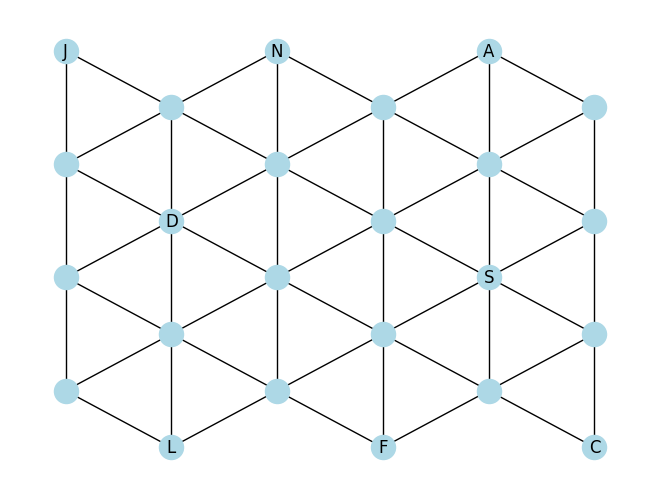

In [24]:



# Create the graph
G = nx.Graph()
G.add_nodes_from(GRID.keys())

G.add_edges_from(generate_edges(GRID))




# Draw the graph
nx.draw(G, pos={(x, y): (x, y) for x, y in GRID.keys()}, with_labels=False, node_color='lightblue')

labels = {(x, y): GRID[(x, y)] for (x, y) in GRID.keys() if GRID[(x, y)] is not None}

nx.draw_networkx_labels(G, pos={(x, y): (x, y) for x, y in GRID.keys()}, labels=labels)
plt.show()